In [12]:
import pandas as pd
import numpy as np
from hmm import hmm
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report
np.random.seed(1)

In [13]:
## parameters for random initialisation of hmm
rand_pi = np.random.uniform(size=(2,))
rand_A = np.random.uniform(size=(2,2))
rand_B = np.random.uniform(size=(2,2))
rand_pi /= np.sum(rand_pi)
rand_A /= (np.sum(rand_A, axis = 1).reshape(-1,1))
rand_B /= (np.sum(rand_B, axis = 1).reshape(-1,1))
print(rand_pi, rand_A, rand_B)

[0.36666223 0.63333777] [[3.78164892e-04 9.99621835e-01]
 [6.13798727e-01 3.86201273e-01]] [[0.35023106 0.64976894]
 [0.42408526 0.57591474]]


In [14]:
# changing rand_A, because its first row is biased
rand_A = np.array([[0.18885828, 0.81114172],
        [0.39, 0.61]])

In [15]:
pi = np.array([0.5, 0.5])
A = np.array([[0.6, 0.4],[0.3, 0.7]])
B = np.array([[0.8, 0.2], [0.3, 0.7]])

In [16]:
def generate_obs_state(B, state):
    '''applicable if only 2 observations are present
    '''
    max_prob = np.max(B[state])
    index = np.argmax(B[state])
    new_obs = np.random.binomial(n=1, p = B[state][index])
    if new_obs == 1:
        return index
    else:
        return 1-index

In [17]:
num_examples = 5
seq_len = 4
initial_states = []
states = []
observations = []
for i in range(num_examples):
    st = []
    obs = []
    initial_state = np.random.binomial(n= 1, p=pi[0])
    initial_states.append(initial_state)
    st.append(initial_state)
    obs.append(generate_obs_state(B,st[-1]))
    
    for j in range(seq_len-1):
        next_st = generate_obs_state(A, st[-1])
        st.append(next_st)
        obs.append(generate_obs_state(B,st[-1]))
    states.append(st)
    observations.append(obs)
# print(states)
# print(observations)

In [18]:
print(states)
print(observations)

[[0, 0, 0, 0], [0, 1, 1, 0], [0, 0, 0, 1], [1, 1, 1, 0], [0, 0, 1, 1]]
[[0, 1, 0, 0], [0, 0, 1, 1], [0, 1, 0, 1], [1, 0, 0, 0], [0, 0, 1, 1]]


In [19]:
num_examples = 5
seq_len = 7
for i in range(num_examples):
    st = []
    obs = []
    initial_state = np.random.binomial(n= 1, p=pi[0])
    initial_states.append(initial_state)
    st.append(initial_state)
    obs.append(generate_obs_state(B,st[-1]))
    for j in range(seq_len):
        next_st = generate_obs_state(A, st[-1])
        st.append(next_st)
        obs.append(generate_obs_state(B,st[-1]))
    states.append(st)
    observations.append(obs)

In [20]:
print(states)
print('..')
print(observations)

[[0, 0, 0, 0], [0, 1, 1, 0], [0, 0, 0, 1], [1, 1, 1, 0], [0, 0, 1, 1], [0, 0, 0, 0, 0, 0, 1, 1], [1, 0, 1, 1, 1, 0, 1, 0], [1, 1, 1, 1, 1, 1, 1, 0], [0, 0, 1, 0, 0, 1, 1, 0], [0, 1, 0, 0, 0, 1, 1, 1]]
..
[[0, 1, 0, 0], [0, 0, 1, 1], [0, 1, 0, 1], [1, 0, 0, 0], [0, 0, 1, 1], [0, 0, 0, 0, 0, 0, 1, 1], [1, 0, 1, 0, 1, 0, 0, 0], [1, 0, 0, 1, 0, 1, 1, 0], [0, 0, 1, 0, 1, 0, 1, 0], [0, 0, 0, 0, 0, 1, 0, 1]]


In [21]:
observations = [np.asarray(i) for i in observations]
states = [np.asarray(i) for i in states]

In [22]:
# random initialisation of params
from hmm import hmm_scale
hm2 = hmm_scale(num_states=2, num_obs= 2, A = rand_A, B = rand_B, pie = rand_pi)

In [23]:
print('pi: ',hm2.pie)
print('state transition matrix: \n',hm2.A)
print('emission probability matrix: \n',hm2.B)

pi:  [0.36666223 0.63333777]
state transition matrix: 
 [[0.18885828 0.81114172]
 [0.39       0.61      ]]
emission probability matrix: 
 [[0.35023106 0.64976894]
 [0.42408526 0.57591474]]


In [24]:
labels = []
for i in observations:
    _,l,_ = hm2.viterbiAlgorithm(i)
    labels.append(l)
states_l = [j for i in states for j in i ]
labels_l = [j for i in labels for j in i ]
print(classification_report(states_l, labels_l))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        31
           1       0.48      1.00      0.65        29

    accuracy                           0.48        60
   macro avg       0.24      0.50      0.33        60
weighted avg       0.23      0.48      0.31        60



/Users/sonud/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [25]:
# states, labels, observations

prob_of_obs is 0.03810113099610439
prob_of_obs is 0.05716799058417256
prob_of_obs is 0.05728792505643635
prob_of_obs is 0.03860240625808309
prob_of_obs is 0.05716799058417256
prob_of_obs is 0.0014571839450737698
prob_of_obs is 0.0022361074830703465
prob_of_obs is 0.0033480155215774143
prob_of_obs is 0.0022126114497776285
prob_of_obs is 0.001463806310093814
prob_of_obs is 0.09280087297204305
prob_of_obs is 0.05359602909237587
prob_of_obs is 0.05375863138636876
prob_of_obs is 0.09398622353720223
prob_of_obs is 0.05359602909237587
prob_of_obs is 0.008623459530458233
prob_of_obs is 0.005094578129588012
prob_of_obs is 0.002934060024987368
prob_of_obs is 0.005041970329752573
prob_of_obs is 0.008670257703653057
prob_of_obs is 0.09283542590988801
prob_of_obs is 0.05358592336205031
prob_of_obs is 0.053799902089229724
prob_of_obs is 0.09396221923818568
prob_of_obs is 0.05358592336205031
prob_of_obs is 0.008618841516574818
prob_of_obs is 0.005097773943413207
prob_of_obs is 0.0029345590056120098
p

Text(0, 0.5, 'log prob of examples')

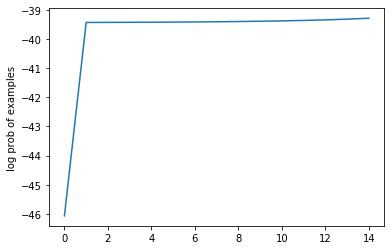

In [26]:
log_prob = []
for i in range(15):
    log_prob_of_examples = hm2.train_on_examples(observations= observations, verbose = False)
    log_prob.append(log_prob_of_examples)
plt.plot(log_prob)
plt.ylabel('log prob of examples')

In [27]:
print('pi: ',hm2.pie)
print('state transition matrix: \n',hm2.A)
print('emission probability matrix: \n',hm2.B)

pi:  [0.30115671 0.69884329]
state transition matrix: 
 [[0.15219384 0.84780616]
 [0.41635755 0.58364245]]
emission probability matrix: 
 [[0.46608161 0.53391839]
 [0.71433652 0.28566348]]


In [28]:
log_prob_of_examples

-39.27456953430538

In [29]:
hm2.pie, hm2.A, hm2.B

(array([0.30115671, 0.69884329]), array([[0.15219384, 0.84780616],
        [0.41635755, 0.58364245]]), array([[0.46608161, 0.53391839],
        [0.71433652, 0.28566348]]))

In [30]:
labels = []
for i in observations:
    _,l,_ = hm2.viterbiAlgorithm(i)
    labels.append(l)
states_l = [j for i in states for j in i ]
labels_l = [j for i in labels for j in i ]
print(classification_report(states_l, labels_l))

              precision    recall  f1-score   support

           0       0.17      0.10      0.12        31
           1       0.33      0.48      0.39        29

    accuracy                           0.28        60
   macro avg       0.25      0.29      0.26        60
weighted avg       0.25      0.28      0.25        60



prob_of_obs is 0.10384181732813148
prob_of_obs is 0.049693397267222564
prob_of_obs is 0.06886209915022204
prob_of_obs is 0.08592750387657477
prob_of_obs is 0.049693397267222564
prob_of_obs is 0.007169692482954598
prob_of_obs is 0.006152149816888913
prob_of_obs is 0.0029701744584128857
prob_of_obs is 0.00735160337462059
prob_of_obs is 0.009488644792411776
prob_of_obs is 0.10611642370916143
prob_of_obs is 0.048176897521682714
prob_of_obs is 0.07288177347804879
prob_of_obs is 0.0849609322027507
prob_of_obs is 0.048176897521682714
prob_of_obs is 0.006761951879567883
prob_of_obs is 0.0065604923485109235
prob_of_obs is 0.0029822809352189968
prob_of_obs is 0.008099133618068344
prob_of_obs is 0.009681456527160816
prob_of_obs is 0.10848230666088694
prob_of_obs is 0.04632170536655256
prob_of_obs is 0.07750785344956687
prob_of_obs is 0.08418249218502831
prob_of_obs is 0.04632170536655256
prob_of_obs is 0.0062998462031967585
prob_of_obs is 0.007082258313263835
prob_of_obs is 0.0029930617570948833


Text(0, 0.5, 'log prob of examples')

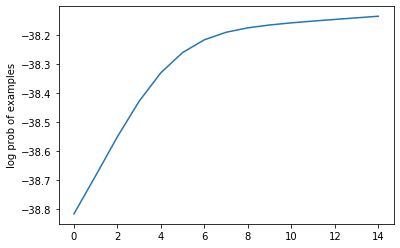

In [32]:
log_prob = []
for i in range(15):
    log_prob_of_examples = hm2.train_on_examples(observations= observations, verbose = False)
    log_prob.append(log_prob_of_examples)
plt.plot(log_prob)
plt.ylabel('log prob of examples')

In [33]:
print(hm2.pie, hm2.A, hm2.B)

labels = []
for i in observations:
    _,l,_ = hm2.viterbiAlgorithm(i)
    labels.append(l)
states_l = [j for i in states for j in i ]
labels_l = [j for i in labels for j in i ]
print(classification_report(states_l, labels_l))

[0.38028887 0.61971113] [[0.07293152 0.92706848]
 [0.59833785 0.40166215]] [[0.27155884 0.72844116]
 [0.86690506 0.13309494]]
              precision    recall  f1-score   support

           0       0.25      0.19      0.22        31
           1       0.31      0.38      0.34        29

    accuracy                           0.28        60
   macro avg       0.28      0.29      0.28        60
weighted avg       0.28      0.28      0.28        60

